In [1]:
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
%aimport std_func

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

## Estimates from Sample Covariance

The portfolios we constructed in this notebook serve as reference to the portfolios using cosine similarity estimates and factor model estimates. Here, we simply use the sample return and sample covariance to generate portfolios for each industry.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
r_selected = pd.read_csv("data/filtered_r.csv")
# get the mean of all 
r_selected.set_index("name", inplace = True)
mu = r_selected.mean(axis = 1)
# compute the covariance matrix 
cov = r_selected.T.cov()

### Perform Mean-Variance Analysis
We will use one industry per time to generate a minimum-variance portfolio. In our demonstration of mean-variance analysis process, we use the industry `pharmaceutical preparations` whose SIC code is `2834`. At the end, we will show the results for other industries. 

We first get the name list of `pharmaceutical preparations` companies and match the names with the companies in returns data. Then, we get the sample mean and sample covariance for this specific industry. We get the efficient frontier, the set of optimal portfolios, for the industry; and recognize the minimum-variance portfolio.

In [4]:
#!pip install dataframe_image

In [5]:
!pip install PyPortfolioOpt

In [6]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt import plotting

In [7]:
df = pd.read_csv('../data/preprocessed.csv',
                 usecols = ['reportingDate', 'name', 'CIK',
                           'coDescription_stopwords', 'SIC', 'SIC_desc'])
df = df.set_index(df.name)

In [8]:
# get the names of the companies in the pharmaceutical preparations industry
Pharm = df[df.SIC == 2834]
Pharm_list = Pharm.index

In [9]:
# get the companies name that match return data and business description data
SET = (set(Pharm_list) & set(r_selected.index))
LIST = [*SET, ]

#### Sample Mean for the Pharmaceutical Preparations Industry

In [10]:
mu_Pharm = mu[LIST]
mu_Pharm

name
LILLY ELI & CO                   0.017574
ANI PHARMACEUTICALS INC         -0.000895
SERES THERAPEUTICS, INC.        -0.035758
IMMUNOGEN INC                    0.021513
CHIASMA, INC                     0.018143
                                   ...   
BRISTOL MYERS SQUIBB CO         -0.004359
LEXICON PHARMACEUTICALS, INC.   -0.013984
PROGENICS PHARMACEUTICALS INC    0.011256
XOMA CORP                        0.027546
BIOMARIN PHARMACEUTICAL INC      0.001661
Length: 124, dtype: float64

#### Sample Covariance for the Pharmaceutical Preparations Industry

In [11]:
tmp = cov[LIST].T
cov_Pharm = tmp[LIST]
cov_Pharm

name,LILLY ELI & CO,ANI PHARMACEUTICALS INC,"SERES THERAPEUTICS, INC.",IMMUNOGEN INC,"CHIASMA, INC",ACADIA PHARMACEUTICALS INC,TEVA PHARMACEUTICAL INDUSTRIES LTD,EYEGATE PHARMACEUTICALS INC,"AQUINOX PHARMACEUTICALS, INC","RETROPHIN, INC.",...,"FIBROCELL SCIENCE, INC.","CYMABAY THERAPEUTICS, INC.","VERASTEM, INC.",MARINUS PHARMACEUTICALS INC,FIVE PRIME THERAPEUTICS INC,BRISTOL MYERS SQUIBB CO,"LEXICON PHARMACEUTICALS, INC.",PROGENICS PHARMACEUTICALS INC,XOMA CORP,BIOMARIN PHARMACEUTICAL INC
name,,,,,,,,,,,,,,,,,,,,,
LILLY ELI & CO,0.003017,0.001520,0.002557,0.001418,0.002699,0.001991,0.002744,0.005505,0.000891,0.001166,...,-0.000677,-0.001507,0.003343,0.005194,0.000214,0.001035,0.002664,-0.000443,0.003200,0.001831
ANI PHARMACEUTICALS INC,0.001520,0.010194,0.003685,0.002446,-0.001768,0.003747,0.005189,0.003927,0.000783,0.005045,...,0.001456,-0.003294,0.002544,0.013062,0.005149,0.002275,0.007183,0.004171,0.008308,0.003723
"SERES THERAPEUTICS, INC.",0.002557,0.003685,0.036740,0.014939,0.015020,0.000433,0.008387,0.015241,-0.000990,0.008466,...,0.012216,0.006272,0.025074,0.020797,0.000502,0.001403,0.006296,-0.002499,0.008580,-0.001477
IMMUNOGEN INC,0.001418,0.002446,0.014939,0.054333,0.010837,0.009262,0.002909,0.008265,0.016301,0.012573,...,0.026187,0.026210,0.011818,0.030133,0.003954,0.006100,0.011767,0.013295,0.016578,0.006327
"CHIASMA, INC",0.002699,-0.001768,0.015020,0.010837,0.049106,0.015785,-0.008203,-0.008895,0.004271,0.009495,...,0.010825,-0.008056,0.008784,0.031829,0.009991,0.001639,0.000866,-0.002141,0.010006,0.001363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BRISTOL MYERS SQUIBB CO,0.001035,0.002275,0.001403,0.006100,0.001639,0.004699,0.001119,0.002791,-0.000739,0.002464,...,0.001211,0.004839,0.000120,0.005778,0.003855,0.007213,0.003402,0.006694,0.005690,0.001860
"LEXICON PHARMACEUTICALS, INC.",0.002664,0.007183,0.006296,0.011767,0.000866,0.008199,0.009561,0.006147,0.008030,0.011627,...,0.007655,0.001920,0.009030,0.012878,0.006360,0.003402,0.021954,0.010874,-0.001158,0.007226
PROGENICS PHARMACEUTICALS INC,-0.000443,0.004171,-0.002499,0.013295,-0.002141,0.011699,0.003676,0.010493,0.020040,0.008355,...,0.012289,0.021213,-0.001409,0.015384,0.016159,0.006694,0.010874,0.041838,0.009499,0.009993


#### Efficient Frontier - Pharmaceutical Preparations

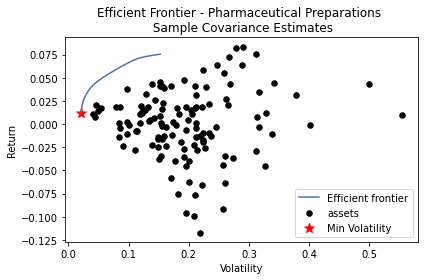

In [12]:
ef1 = EfficientFrontier(mu_Pharm, cov_Pharm, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_Pharm, cov_Pharm, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - Pharmaceutical Preparations \n Sample Covariance Estimates")
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Returns.png', dpi=200, bbox_inches='tight')
plt.show()

##### Min Volatility Portfolio

###### Performance

In [13]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 1.2%
Annual volatility: 2.1%
Sharpe Ratio: -0.35


###### Weights

In [14]:
companies = []
weights = []
for company, weight in ef2.clean_weights().items():
    if weight != 0:
        companies.append(company)
        weights.append(weight)
        
dic = {'Company_Name':companies,'Weight':weights}
min_vol = pd.DataFrame(dic)

In [15]:
pd.read_csv("data/min_vol_sample_Pharmaceutical_Preparations.csv")

,Company_Name,Weight
0,"CHEMBIO DIAGNOSTICS, INC.",0.02843
1,JOHNSON & JOHNSON,0.17878
2,BIODELIVERY SCIENCES INTERNATIONAL INC,0.03680
3,"PROPHASE LABS, INC.",0.05120
4,ORAMED PHARMACEUTICALS INC.,0.04982
5,XENON PHARMACEUTICALS INC.,0.01350
6,BRISTOL MYERS SQUIBB CO,0.12824
7,PFENEX INC.,0.03777
8,ACHAOGEN INC,0.00515
9,ZOETIS INC.,0.01195


### Results for the Other 4 Industries

In [16]:
SIC_list = [7372, 1311, 6798, 6022]
SIC_desc = ['Prepackaged Software (mass reproduction of software)', 'Crude Petroleum and Natural Gas', 
           'Real Estate Investment Trusts', 'State Commercial Banks (commercial banking)']

#### Prepackaged Software (mass reproduction of software)

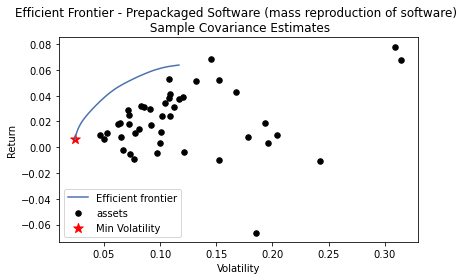

In [17]:
SIC = SIC_list[0]
    
industry_name = SIC_desc[SIC_list.index(SIC)]
    
# get the names of the companies in the other industries
Companies = df[df.SIC == SIC]
Company_list = Companies.index

# get the companies name that match return data and business description data
SET = (set(Company_list) & set(r_selected.index))
LIST = [*SET, ]

mu_sample = mu[LIST]
# get the outliers
outlier = mu_sample[mu_sample>1].index
mu_sample = mu_sample.drop(outlier)
LIST = mu_sample.index

tmp = cov[LIST].T
cov_sample = tmp[LIST]

# perform minimum variance analysis
ef1 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - %s \n Sample Covariance Estimates" %industry_name)
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Sample_Covariance_Estimates' + str(industry_name) + '.png', dpi=200, bbox_inches='tight')
plt.show()

##### Min Volatility Portfolio

###### Performance

In [18]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 0.6%
Annual volatility: 2.4%
Sharpe Ratio: -0.57


###### Weights

In [19]:
pd.read_csv("data/min_vol_sample_Prepackaged_Software.csv")

,Company_Name,Weight
0,MAJESCO,0.01906
1,"NUANCE COMMUNICATIONS, INC.",0.08608
2,AWARE INC /MA/,0.20000
3,MICROSTRATEGY INC,0.02160
4,QUMU CORP,0.05153
5,ROSETTA STONE INC,0.01647
6,COMMVAULT SYSTEMS INC,0.07381
7,"ENDURANCE INTERNATIONAL GROUP HOLDINGS, INC.",0.02554
8,"QUALYS, INC.",0.06668
9,LIVEPERSON INC,0.01519


#### Crude Petroleum and Natural Gas
When we conduct the same analysis, there is no weight shown. Efficient frontier cannot be found.

#### Real Estate Investment Trusts

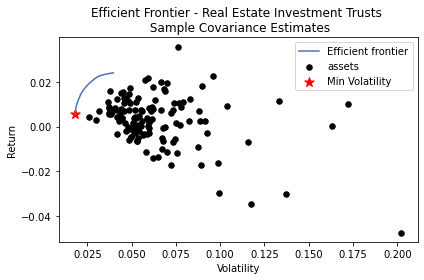

In [25]:
SIC = SIC_list[2]
    
industry_name = SIC_desc[SIC_list.index(SIC)]
    
# get the names of the companies in the other industries
Companies = df[df.SIC == SIC]
Company_list = Companies.index

# get the companies name that match return data and business description data
SET = (set(Company_list) & set(r_selected.index))
LIST = [*SET, ]

mu_sample = mu[LIST]
# get the outliers
outlier = mu_sample[mu_sample>1].index
mu_sample = mu_sample.drop(outlier)
LIST = mu_sample.index

tmp = cov[LIST].T
cov_sample = tmp[LIST]

# perform minimum variance analysis
ef1 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - %s \n Sample Covariance Estimates" %industry_name)
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Sample_Covariance_Estimates' + str(industry_name) + '.png', dpi=200, bbox_inches='tight')
plt.show()

##### Min Volatility Portfolio

###### Performance

In [26]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 0.5%
Annual volatility: 1.8%
Sharpe Ratio: -0.80


###### Weights

In [27]:
pd.read_csv("data/min_vol_sample_Real_Estate_Investment_Trusts.csv")

,Company_Name,Weight
0,BRT APARTMENTS CORP.,0.01724
1,PUBLIC STORAGE,0.10938
2,GREAT AJAX CORP.,0.20000
3,ALEXANDERS INC,0.02285
4,LADDER CAPITAL CORP,0.04420
5,CIM COMMERCIAL TRUST CORP,0.05461
6,ARES COMMERCIAL REAL ESTATE CORP,0.09107
7,"MANHATTAN BRIDGE CAPITAL, INC",0.01483
8,HMG COURTLAND PROPERTIES INC,0.12513
9,NEW YORK MORTGAGE TRUST INC,0.02084


#### State Commercial Banks (commercial banking)

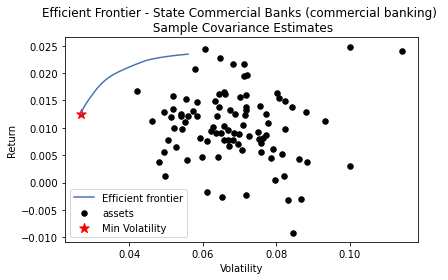

In [28]:
SIC = SIC_list[3]
    
industry_name = SIC_desc[SIC_list.index(SIC)]
    
# get the names of the companies in the other industries
Companies = df[df.SIC == SIC]
Company_list = Companies.index

# get the companies name that match return data and business description data
SET = (set(Company_list) & set(r_selected.index))
LIST = [*SET, ]

mu_sample = mu[LIST]
# get the outliers
outlier = mu_sample[mu_sample>1].index
mu_sample = mu_sample.drop(outlier)
LIST = mu_sample.index

tmp = cov[LIST].T
cov_sample = tmp[LIST]

# perform minimum variance analysis
ef1 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_sample, cov_sample, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - %s \n Sample Covariance Estimates" %industry_name)
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Sample_Covariance_Estimates' + str(industry_name) + '.png', dpi=200, bbox_inches='tight')
plt.show()

##### Min Volatility Portfolio

###### Performance

In [29]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 1.2%
Annual volatility: 2.7%
Sharpe Ratio: -0.28


###### Weights

In [30]:
pd.read_csv("data/min_vol_sample_State_Commercial_Banks.csv")

,Company_Name,Weight
0,"RELIANT BANCORP, INC.",0.12273
1,"CAROLINA TRUST BANCSHARES, INC.",0.11786
2,INVESTAR HOLDING CORP,0.19440
3,FIRST COMMUNITY CORP /SC/,0.05076
4,VILLAGE BANK & TRUST FINANCIAL CORP.,0.13994
5,BANK OF THE JAMES FINANCIAL GROUP INC,0.00178
6,CITIZENS & NORTHERN CORP,0.05375
7,BANK OF NEW YORK MELLON CORP,0.09533
8,"FAUQUIER BANKSHARES, INC.",0.02143
9,MACKINAC FINANCIAL CORP /MI/,0.02478
